# Imports and Catalogues

In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.table import join
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import astropy.cosmology.units as cu
from astropy.coordinates import SkyCoord
from scipy.optimize import linear_sum_assignment
import all_fctns

SAMI_Target_catalogues = ("InputCatGAMADR3.fits", "InputCatClustersDR3.fits", "InputCatFiller.fits")
SAMI_regions = {0: "GAMA", 1: "Clusters", 2: "Filler"}

Source_dir ="C:\\Users\\mspan\\OneDrive - The University of Sydney (Students)\\Honours\\Honours Project\\"
catalogue_filepath = Source_dir + "Catalogues\\"
SAMI_regions = ("Cluster", "Filler", "GAMA")
SAMI_spectra_catalogue = "EmissionLine1compDR3.fits"
SAMI_SFR_catalogue = "AR2022_SAMI_DR3_Mstar_SFR_GSWL_rescaled.fits"
SAMI_AGN_summary_catalogue = "Crossmatched\\SAMI_AGN_matches.fits"
SAMI_cubeobs_catalogue = "CubeObs.fits"

shared_catalogue_filepath = Source_dir +  "SAMI_TOOLS_SMC_MSPA4681\\shared_catalogues\\"
gassig_statistics_catalogue = "gassig_statistics.fits"

def refresh_module():
    import importlib
    import all_fctns
    importlib.reload(all_fctns)


with fits.open(catalogue_filepath + "\\Crossmatched\\SAMI_AGN_matches.fits") as SAMI_AGN_matches_hdul:
    Summary_table_hdu = Table(SAMI_AGN_matches_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_SFR_catalogue) as SAMI_SFR_hdul:
    SAMI_SFR_table_hdu = Table(SAMI_SFR_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_cubeobs_catalogue) as SAMI_CubeObs_hdul:
    SAMI_CubeObs_table_hdu =  Table(SAMI_CubeObs_hdul[1].data)

with fits.open(shared_catalogue_filepath + gassig_statistics_catalogue) as gassig_statistics_hdul:
    gassig_statistics_table = Table(gassig_statistics_hdul[1].data)

# Spectrum Comparison Plot

<>:31: SyntaxWarning: invalid escape sequence '\A'
<>:31: SyntaxWarning: invalid escape sequence '\A'
C:\Users\mspan\AppData\Local\Temp\ipykernel_5568\1487419415.py:31: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Wavelength ($\AA$)')


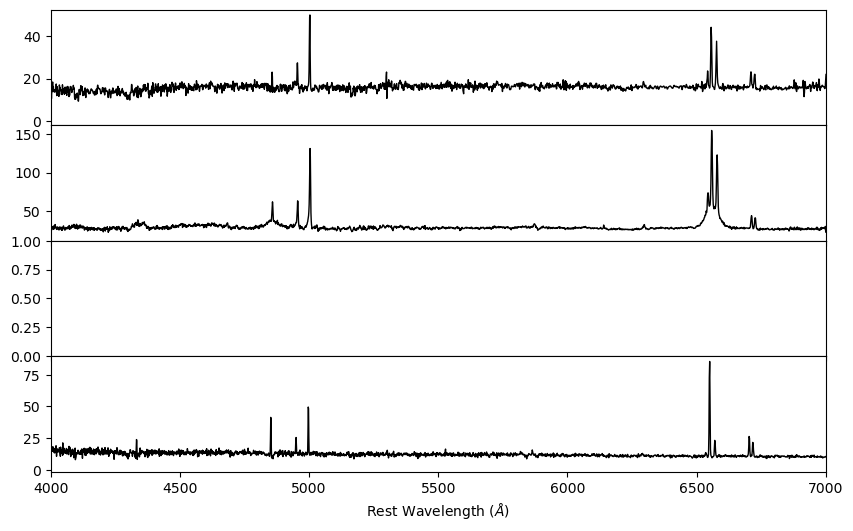

In [48]:
# get SDSS spectra
HII_spectra_catid = 9163
Seyfert2_spectra_catid = 376478
Seyfert1_spectra_catid = 376679

flux_quality = 1 # 1 for raw, 2 for fit

HII_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{HII_spectra_catid}.csv", delimiter=',', skiprows=1)
HII_spectra_wavelengths = HII_spectra[:, 0] / (1+ Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == HII_spectra_catid])
HII_spectra_flux = HII_spectra[:, flux_quality]

Seyfert2_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{Seyfert2_spectra_catid}.csv", delimiter=',', skiprows=1)
Seyfert2_spectra_wavelengths = Seyfert2_spectra[:, 0] / (1 + Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == Seyfert2_spectra_catid])
Seyfert2_spectra_flux = Seyfert2_spectra[:, flux_quality]

Seyfert1_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{Seyfert1_spectra_catid}.csv", delimiter=',', skiprows=1)
Seyfert1_spectra_wavelengths = Seyfert1_spectra[:, 0] / (1 + Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == Seyfert1_spectra_catid])
Seyfert1_spectra_flux = Seyfert1_spectra[:, flux_quality]

fig, axs = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0) # Set vertical spacing to 0


axs[0].plot(Seyfert2_spectra_wavelengths, Seyfert2_spectra_flux, 'k', label='Seyfert 2 Spectrum', lw=1)

axs[1].plot(Seyfert1_spectra_wavelengths, Seyfert1_spectra_flux, 'k', label='Seyfert 1 Spectrum', lw=1)

axs[3].plot(HII_spectra_wavelengths, HII_spectra_flux,  'k', label='HII Spectrum', lw=1)

plt.xlim(4000, 7000)
plt.xlabel('Rest Wavelength ($\AA$)')
plt.show()
# plt.show()